# (ProsperLoanData Exploration )
## by (Abdalla Hassan Ammar)

## Preliminary Wrangling
##### Intro
> Hi, We will be exploring the Prosper Loan Dataset. Prosper is a San Francisco based company in the peer-to-peer lending marketplace in the United States and it's  where you micro-invest amounts as small as $25 in other user's loans.

This dataset contains data from over 110,000 prosper loans.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Read in dataset from CSV file
loan_df=pd.read_csv('prosperLoanData.csv')

In [3]:
print(loan_df.shape)

(113937, 81)


In [4]:
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

###### There are many column have a missy records .. we going to dropm them or select only coulmn we only need on our analysis

In [6]:
loan_df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
loan_df_li = loan_df[['BorrowerRate','ListingCreationDate', 'ProsperScore', 'Term', 'MonthlyLoanPayment', \
                             'StatedMonthlyIncome', 'BorrowerAPR', 'DebtToIncomeRatio','RevolvingCreditBalance', \
                             'BorrowerState', 'ListingCategory (numeric)','ListingKey',
                      'LoanStatus', 'EstimatedReturn', 'LenderYield', 'EmploymentStatus',
                      'IsBorrowerHomeowner', 'CreditScoreRangeLower','CreditGrade', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'IncomeRange','Occupation', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'EmploymentStatus']]

In [8]:
loan_df_li['CreditScoreMean'] = loan_df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)

F:\anaconda_files\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
loan_df_li

,BorrowerRate,ListingCreationDate,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,...,CreditScoreRangeLower,CreditGrade,LoanMonthsSinceOrigination,LoanOriginalAmount,IncomeRange,Occupation,ProsperRating (numeric),ProsperRating (Alpha),EmploymentStatus,CreditScoreMean
0,0.1580,2007-08-26 19:09:29.263000000,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,...,640.0,C,78,9425,"$25,000-49,999",Other,NaN,NaN,Self-employed,649.5
1,0.0920,2014-02-27 08:28:07.900000000,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,...,680.0,NaN,0,10000,"$50,000-74,999",Professional,6.0,A,Employed,689.5
2,0.2750,2007-01-05 15:00:47.090000000,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,...,480.0,HR,86,3001,Not displayed,Other,NaN,NaN,Not available,489.5
3,0.0974,2012-10-22 11:02:35.010000000,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,...,800.0,NaN,16,10000,"$25,000-49,999",Skilled Labor,6.0,A,Employed,809.5
4,0.2085,2013-09-14 18:38:39.097000000,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,...,680.0,NaN,6,15000,"$100,000+",Executive,3.0,D,Employed,689.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.1864,2013-04-14 05:55:02.663000000,5.0,36,364.74,4333.333333,0.22354,0.13,7714.0,IL,...,700.0,NaN,11,10000,"$50,000-74,999",Food Service Management,4.0,C,Employed,709.5
113933,0.1110,2011-11-03 20:42:55.333000000,8.0,36,65.57,8041.666667,0.13220,0.11,15743.0,PA,...,700.0,NaN,28,2000,"$75,000-99,999",Professional,6.0,A,Employed,709.5
113934,0.2150,2013-12-13 05:49:12.703000000,3.0,60,273.35,2875.000000,0.23984,0.51,22147.0,TX,...,700.0,NaN,3,10000,"$25,000-49,999",Other,3.0,D,Employed,709.5
113935,0.2605,2011-11-14 13:18:26.597000000,5.0,60,449.55,3875.000000,0.28408,0.48,11956.0,GA,...,680.0,NaN,28,15000,"$25,000-49,999",Food Service,4.0,C,Full-time,689.5


In [10]:
loan_df_li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   BorrowerRate                113937 non-null  float64
 1   ListingCreationDate         113937 non-null  object 
 2   ProsperScore                84853 non-null   float64
 3   Term                        113937 non-null  int64  
 4   MonthlyLoanPayment          113937 non-null  float64
 5   StatedMonthlyIncome         113937 non-null  float64
 6   BorrowerAPR                 113912 non-null  float64
 7   DebtToIncomeRatio           105383 non-null  float64
 8   RevolvingCreditBalance      106333 non-null  float64
 9   BorrowerState               108422 non-null  object 
 10  ListingCategory (numeric)   113937 non-null  int64  
 11  ListingKey                  113937 non-null  object 
 12  LoanStatus                  113937 non-null  object 
 13  EstimatedRetur

In [11]:
## Lower case all labels
loan_df_li.columns = map(str.lower, loan_df_li.columns)

In [12]:
loan_df_li.isnull().sum()

borrowerrate                      0
listingcreationdate               0
prosperscore                  29084
term                              0
monthlyloanpayment                0
statedmonthlyincome               0
borrowerapr                      25
debttoincomeratio              8554
revolvingcreditbalance         7604
borrowerstate                  5515
listingcategory (numeric)         0
listingkey                        0
loanstatus                        0
estimatedreturn               29084
lenderyield                       0
employmentstatus               2255
isborrowerhomeowner               0
creditscorerangelower           591
creditgrade                   84984
loanmonthssinceorigination        0
loanoriginalamount                0
incomerange                       0
occupation                     3588
prosperrating (numeric)       29084
prosperrating (alpha)         29084
employmentstatus               2255
creditscoremean                 591
dtype: int64

In [13]:
loan_df_li = loan_df_li.dropna(subset = ['employmentstatus', 'creditscorerangelower','revolvingcreditbalance','borrowerstate'], how = 'any')

In [14]:
loan_df_li.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104594 entries, 0 to 113936
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   borrowerrate                104594 non-null  float64
 1   listingcreationdate         104594 non-null  object 
 2   prosperscore                84853 non-null   float64
 3   term                        104594 non-null  int64  
 4   monthlyloanpayment          104594 non-null  float64
 5   statedmonthlyincome         104594 non-null  float64
 6   borrowerapr                 104594 non-null  float64
 7   debttoincomeratio           96187 non-null   float64
 8   revolvingcreditbalance      104594 non-null  float64
 9   borrowerstate               104594 non-null  object 
 10  listingcategory (numeric)   104594 non-null  int64  
 11  listingkey                  104594 non-null  object 
 12  loanstatus                  104594 non-null  object 
 13  estimatedretur

In [15]:
loan_df_li['debttoincomeratio'].fillna(np.mean,inplace=True)
loan_df_li['estimatedreturn'].fillna(np.mean,inplace=True)

F:\anaconda_files\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
loan_df_li.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104594 entries, 0 to 113936
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   borrowerrate                104594 non-null  float64
 1   listingcreationdate         104594 non-null  object 
 2   prosperscore                84853 non-null   float64
 3   term                        104594 non-null  int64  
 4   monthlyloanpayment          104594 non-null  float64
 5   statedmonthlyincome         104594 non-null  float64
 6   borrowerapr                 104594 non-null  float64
 7   debttoincomeratio           96187 non-null   float64
 8   revolvingcreditbalance      104594 non-null  float64
 9   borrowerstate               104594 non-null  object 
 10  listingcategory (numeric)   104594 non-null  int64  
 11  listingkey                  104594 non-null  object 
 12  loanstatus                  104594 non-null  object 
 13  estimatedretur

###### Have null values for  prosperscore Column not a big proplem 

In [17]:
loan_df_li.duplicated().any()

False

### What is the structure of your dataset?

> The dataset contains information on over 110,000 loans originated through the platform. It contains 81 before we clean it and it be 15 after clean , 
Our column definitions can be found in "Prosper Loan Data - Columns Definitions.csv"

Almost all  columns are numeric there ara there are also date/time columns to signify diferent events related to the loan.
Percentage and ratio columns are represneted as decimals, for example 20% is equal to 0.20.
> There are also some ordered categorical variables to represent the "CreditGrade" (pre 2009) or "ProsperRating" (Alpha)` (post July 2009) in the data. The ProsperRating is also represented with a numeric equivalent (0 to 7) and there's a ProsperScore (1 to 10) that determines a _risk score_ for the loan and is based on historical Prosper data available on loans made afer July 2009.

### What is/are the main feature(s) of interest in your dataset?

> I want to know what factors determine a loan's  interest rate?
I am most interested in the "LoanStatus" column. Whether or not a borrower successfully pays their debt seems the most useful thing to know.
And Through our exploration i'm wanting to answer some of the following questions I have:
    
 Why are they borrowing money?
 
 Who are the borrowers? (financial health, income levels, debt ratios)
 
   How much are they paying in interest?
   
  Are these metrics changing over time?
    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The various ratings (CreditGrade & ProsperRating) are likely to have an immediate impact 
TThe credit socre range and the proprietary ProsperScore risk score are likely to be highly correlated
I think we should be able to gather some interesting insights and better understanding our borrowers, hopefully we will find some during exploration

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [18]:
loan_df_li['listingcreationdate'] = pd.to_datetime(loan_df_li.listingcreationdate)

F:\anaconda_files\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


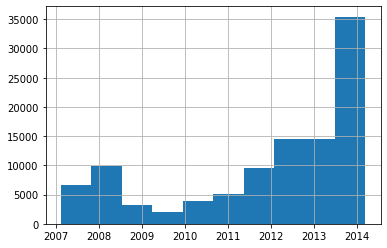

In [19]:
loan_df_li['listingcreationdate'].hist();

F:\anaconda_files\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


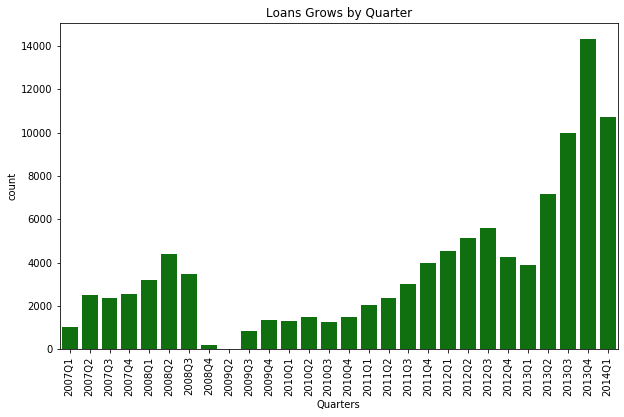

In [20]:
# Create a series  then convert to Quarters
qur = pd.Series(loan_df_li['listingcreationdate'])
qur = pd.PeriodIndex(qur, freq='Q')

# Add a new column to our DF
loan_df_li['Quarters'] =qur

# Grab the unique values in our quarters column
quarters = loan_df_li['Quarters'].unique()

# Sort our list 
qur_s = sorted(quarters)

#Draw our distribution
plt.figure(figsize=(10, 6))
#sb.set(style="darkgrid")
#sb.set(font_scale=1.12)
g = sb.countplot(x='Quarters', data=loan_df_li, color="green", order=qur_s);
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Loans Grows by Quarter');

######  From the Q4 2012 and the Q1 2013 prosper loans have increased quarter over quarter since 2010 at what appears to be a parabolic rate
We saw  at Q3 of 2008 prosper loans essentially fell off a cliff I think it's becouse economic crisis of 2008 came to light, 


In [21]:
loan_df_li.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104594 entries, 0 to 113936
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   borrowerrate                104594 non-null  float64       
 1   listingcreationdate         104594 non-null  datetime64[ns]
 2   prosperscore                84853 non-null   float64       
 3   term                        104594 non-null  int64         
 4   monthlyloanpayment          104594 non-null  float64       
 5   statedmonthlyincome         104594 non-null  float64       
 6   borrowerapr                 104594 non-null  float64       
 7   debttoincomeratio           96187 non-null   float64       
 8   revolvingcreditbalance      104594 non-null  float64       
 9   borrowerstate               104594 non-null  object        
 10  listingcategory (numeric)   104594 non-null  int64         
 11  listingkey                  104594 non-

In [22]:
cols = ['creditgrade']
loan_df_li[cols] = loan_df_li[cols].astype('category')

F:\anaconda_files\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


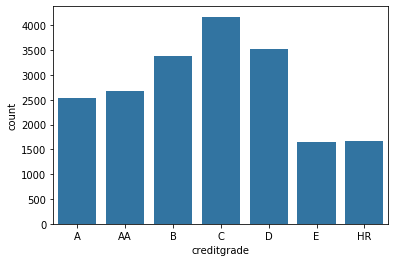

In [23]:
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df_li, x = 'creditgrade', color = base_color);


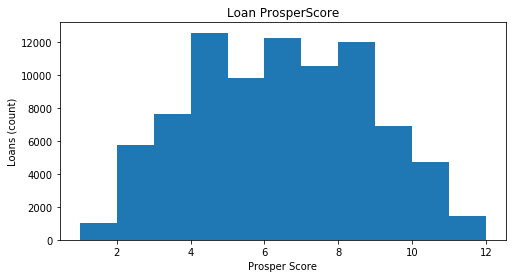

In [24]:
#Plotting our distribution for ProsperScore
bins = np.arange(1, 13, 1)
plt.figure(figsize=(8,4))
plt.hist(data = loan_df_li, x = 'prosperscore', bins=bins);
plt.title("Loan ProsperScore");
plt.xlabel('Prosper Score')
plt.ylabel('Loans (count)');

This prosperscore is quite interesting, our mode is a 4 which is quite low. This indicates that most loans are considered to be high risk. This is telling us a very different story from our credit rating. Let's have a look at our Term variable to see how long most loans are. 

In [25]:
from pandas.api.types import CategoricalDtype

In [26]:
rating = CategoricalDtype(categories=['AA','A', 'B','C','D','E','HR','NC'], ordered=True)
loan_df_li[['prosperrating (alpha)']] = loan_df_li[['prosperrating (alpha)']].astype(rating)

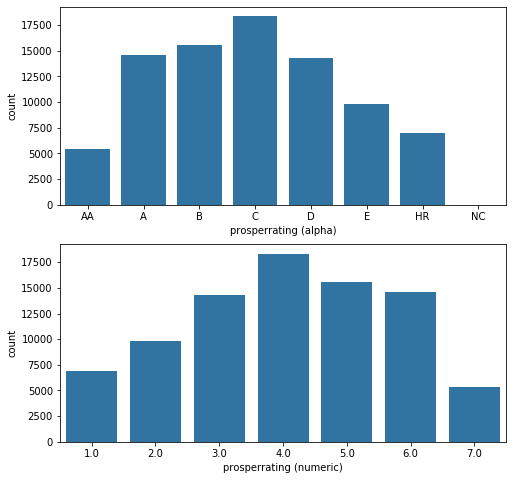

In [27]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

base_color = sb.color_palette()[0]

#sb.countplot(data=loan_df_li, x='creditgrade', color=base_color, ax=ax[0]);
sb.countplot(data=loan_df_li, x='prosperrating (alpha)', color=base_color, ax=ax[0]);
sb.countplot(data=loan_df_li, x='prosperrating (numeric)', color=base_color, ax=ax[1]);
#sb.countplot(data=loan_df_li, x='prosperscore', color=base_color, ax=ax[3]);

plt.show()

ProsperRating (numeric & alpha) appear to be normally distributed and very similar since they represent the same data

Text(0, 0.5, 'Borrowers (count)')

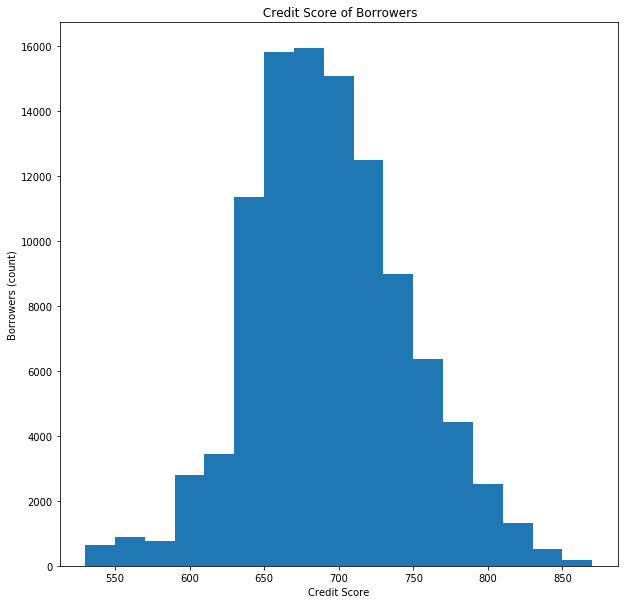

In [28]:

plt.figure(figsize=(10, 10))
plt.hist(data = loan_df_li, x = 'creditscoremean', bins=np.arange(530, 890, 20))
plt.title(' Credit Score of Borrowers')
plt.xlabel('Credit Score')
plt.ylabel('Borrowers (count)')

This plot is for the most part normally distributed with the majority of borrowers having a credit score between 650 and 750

Text(0, 0.5, 'Loans (count)')

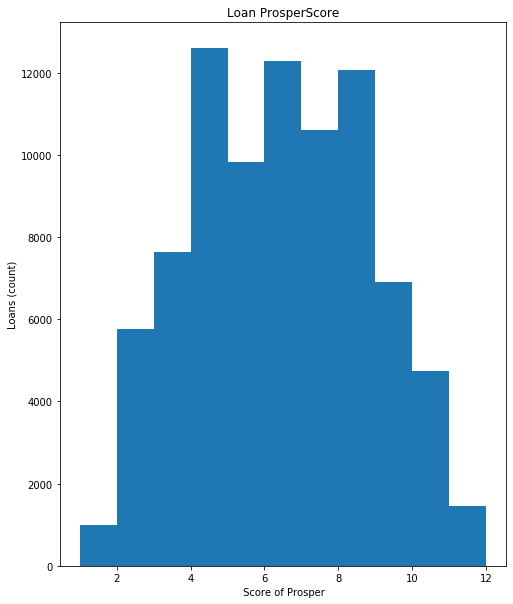

In [29]:
#Plotting our distribution for ProsperScore

plt.figure(figsize=(8, 10))
plt.hist(data = loan_df_li, x = 'prosperscore', bins=np.arange(1, 13, 1))
plt.title("Loan ProsperScore")
plt.xlabel(' Score of Prosper')
plt.ylabel('Loans (count)')

In [30]:
loan_df_li['prosperscore'].mode()

0    4.0
dtype: float64

This prosperscore is quite interesting, our mode is a 4 which is quite low. This indicates that most loans are considered to be high risk

Text(0.5, 0, 'Number of Months')

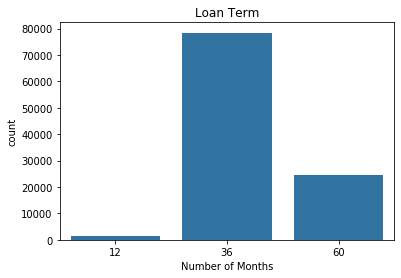

In [31]:


sb.countplot(data=loan_df_li, x='term', color=base_color)
plt.title("Loan Term")
plt.xlabel('Number of Months')


Prosper loans are given in 12, 36 and 60 month terms. It's clear that the majority of our borrowers are opting for a 36 month term

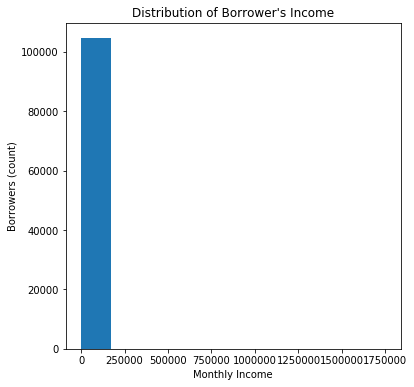

In [32]:
# Using Hist to see distribution for StatedMonthlyIncome
plt.figure(figsize=(6,6))
plt.hist(data = loan_df_li, x = 'statedmonthlyincome')
plt.title("Distribution of Borrower's Income")
plt.xlabel('Monthly Income')
plt.ylabel('Borrowers (count)');

<Figure size 432x432 with 0 Axes>

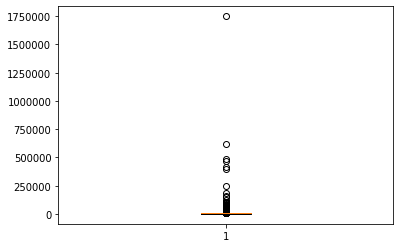

<Figure size 432x432 with 0 Axes>

In [33]:
## Trying define income range
plt.boxplot(loan_df_li.statedmonthlyincome)
plt.figure(figsize=(6,6))

We will take Income between 20,000 and 200,000

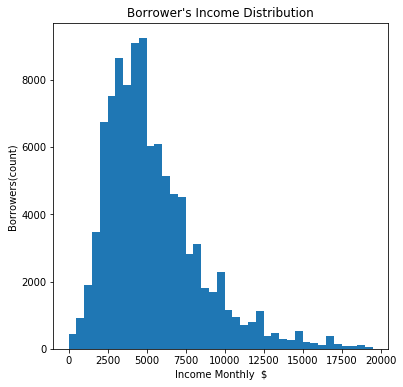

In [34]:
# Using Hist to see distribution for StatedMonthlyIncome
plt.figure(figsize=(6, 6))
plt.hist(data = loan_df_li, x = 'statedmonthlyincome',bins=np.arange(1, 20000, 500))
plt.title("Borrower's Income Distribution")
plt.xlabel('Income Monthly  $')
plt.ylabel('Borrowers(count)');

It appears as though most of our borrowers have a monthly income of roughly 4,000 to 5,000.

Text(0, 0.5, 'Loans (count)')

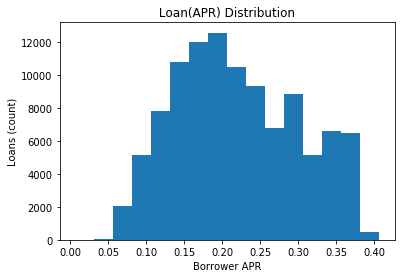

In [35]:
# Plot the distribution of BorrowerAPR

plt.hist(data=loan_df_li, x='borrowerapr', bins=np.arange(loan_df_li.borrowerapr.min(), loan_df_li.borrowerapr.max(), 0.025))
plt.title(' Loan(APR) Distribution ')
plt.xlabel('Borrower APR')
plt.ylabel('Loans (count)')

Our distribution here is almost normally distributed, however it does have a slight right skew. With a large amount of loans in the 0.35 - 0.375 range

Text(0, 0.5, 'Loans(count)')

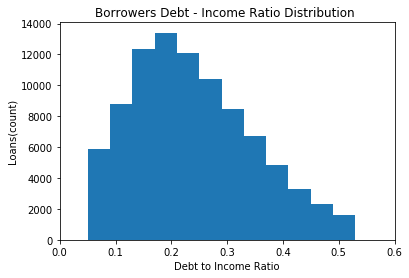

In [36]:
# Using Hist to plot our distribution for DebtToIncomeRatio
plt.hist(data=loan_df_li, x='debttoincomeratio', bins=np.arange(0.05, 0.55, 0.04))
plt.xlim(0,.6);
plt.xlabel('Debt to Income Ratio')
plt.title('Borrowers Debt - Income Ratio Distribution ')
plt.ylabel('Loans(count)')

 The mode of our distribution is below 0.2

###### Finally, let's look at the distrubution of Listing Categories.

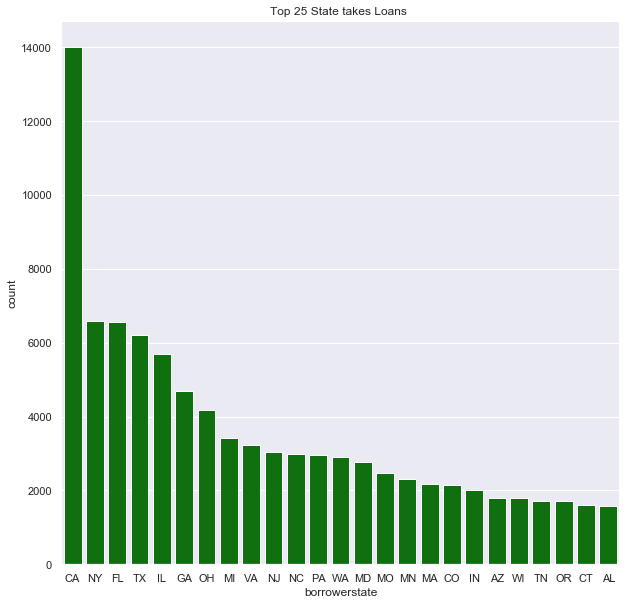

In [37]:
#Drawing our distribution for ProsperScore
plt.figure(figsize=(10, 10))
#sb.set(style="darkgrid")
sb.set(font_scale=1)
sb.countplot(x='borrowerstate', data=loan_df_li, color="green",order=loan_df_li['borrowerstate'].value_counts().iloc[:25].index);
plt.title('Top 25 State takes Loans ');

It shows as though the majority of our borrowers hail from California, Florida, New York ,Texas and Illinois

In [38]:
loan_df_li['listingcategory (numeric)'].shape

(104594,)

In [39]:
loan_df_li.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104594 entries, 0 to 113936
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   borrowerrate                104594 non-null  float64       
 1   listingcreationdate         104594 non-null  datetime64[ns]
 2   prosperscore                84853 non-null   float64       
 3   term                        104594 non-null  int64         
 4   monthlyloanpayment          104594 non-null  float64       
 5   statedmonthlyincome         104594 non-null  float64       
 6   borrowerapr                 104594 non-null  float64       
 7   debttoincomeratio           96187 non-null   float64       
 8   revolvingcreditbalance      104594 non-null  float64       
 9   borrowerstate               104594 non-null  object        
 10  listingcategory (numeric)   104594 non-null  int64         
 11  listingkey                  104594 non-

In [40]:
loan_df_li['listingcategory (numeric)'] = loan_df_li['listingcategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})

F:\anaconda_files\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

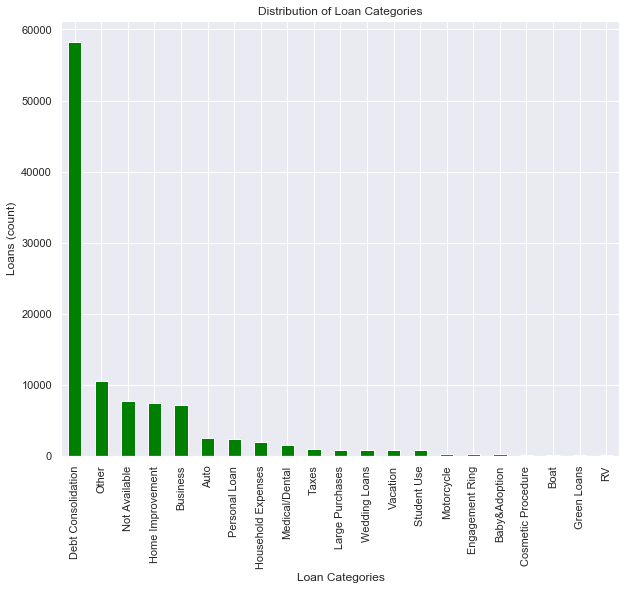

In [41]:
plt.figure(figsize=(10, 8))
pd.value_counts(loan_df_li['listingcategory (numeric)']).plot.bar(color='green');
plt.title('Distribution of Loan Categories');
plt.xlabel('Loan Categories')
plt.ylabel('Loans (count)');
plt.xticks(rotation = 90)

Most Listing Categories are Debt Consolidation. Other popular ones inclure Home Improvement, Auto, Business, and Other. 

### Done
> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> When we  got to the APR distribution I started to believe that these borrowers must be in severe financial trouble. However most of the other data showed otherwise, they had slightly above average credit scores, very good debt to income ratios and minimal revolving credit balances. 



and Most of the variables had expected distributions, with no surpising outliers or discrepancies. The ProsperScore however had large spikes around the 4 and 8 values (1-11 scale) that were higher than the center of the distribution. The DebtToIncomeRatio also contained extreme outliers making the distribution highly skewed, which was mitigated by adjusting the x-axis to only show a ratio between 0 and 1.5.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the Debt ToIncome Ratio was highly skwewed by the presense of those with very high incomes to their debt. 

and There were some outliers in some of the columns that i had to remove I also added some new columns:
    - Added a Quarters column to group Listing dates by Quarter
    - Added a new Credit Score column that is the mean of the Upper and Lower Credit Score range columns
    - Converted the ListingCategory col to a category datatype
    - Changed numerical value to the category they were given with the definition provided
    - Removed all monthly income above 15,000
    - Removed DTI above 1
    

## Bivariate Exploration

> We'll now move to see some  pairwise correlations present between features in the data.

we see that 
CreditGrade gives us a baseline for risk/reward, CreditGrade and LoanStatus seem like the best start

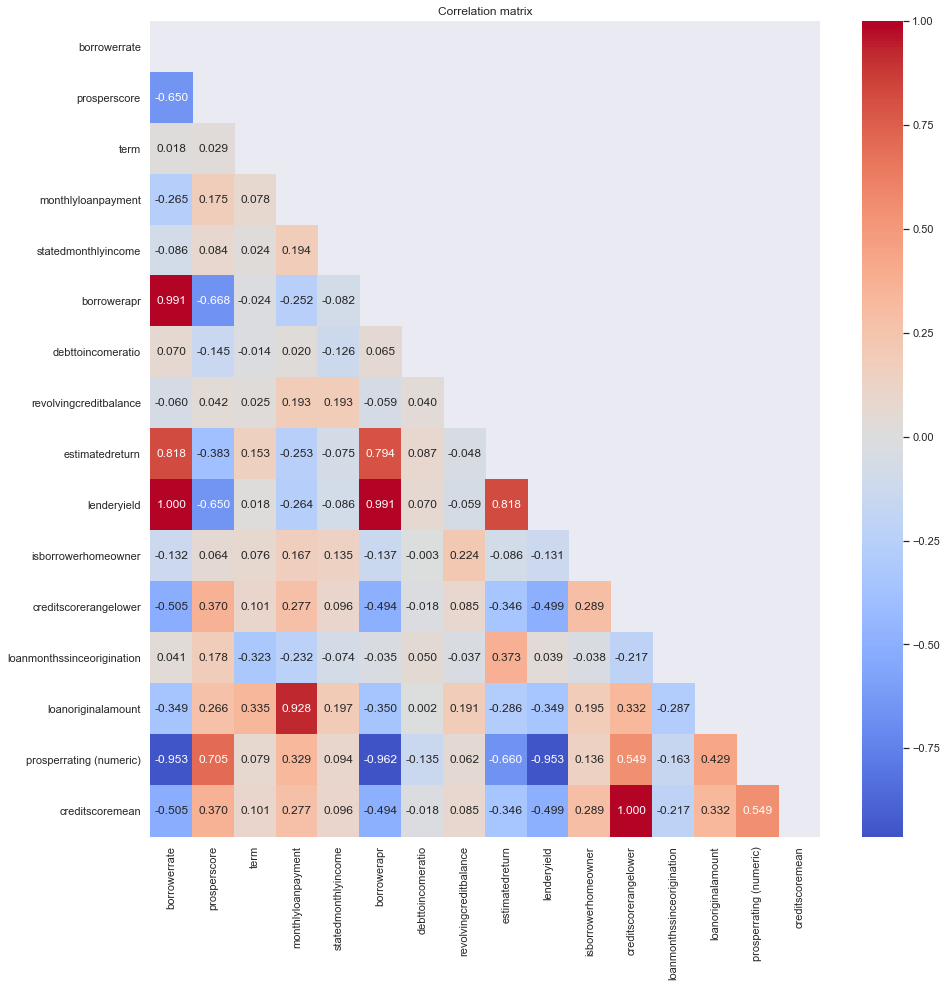

In [43]:

# correlation plot of variables
plt.figure(figsize = [15,15])
msk = np.zeros_like(loan_df_li.corr(),dtype=np.bool)
msk[np.triu_indices_from(msk)] = True
sb.heatmap(loan_df_li.corr(), annot = True, fmt = '.3f', cmap = 'coolwarm', center = 0, mask=msk)
plt.title('Correlation matrix');

The strongest correlation in our dataset __we care about__  is 

1- BorrowerAPR and Prosper rating  is negative correlation of -.962  

2- BorrowerAPR and Prosper Score   is negative correlation of -.668

we see some strong relation between another variable like that between (creditscoremean & prosperscore - ... etc.)
which also makes sense since they are essentially different tools trying to achieve the same purpose, quantify the risk of the loan.

In [ ]:
# #sample_data = np.random.choice(loan_df_li.shape[0], 500, replace = False)
# #df_samp = loan_df_li.loc[sample_data,:]


In [ ]:
# g = sb.pairplot(data=loan_df_li, vars=num_vars, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}

In [44]:
# Look at a PairGrid of the numeric variables 

nums_vars = ['term','creditgrade','prosperrating (numeric)','prosperrating (alpha)','prosperscore', 'monthlyloanpayment', 'borrowerapr', 'revolvingcreditbalance', 'creditscoremean']
samples = np.random.choice(loan_df_li.shape[0], 500, replace=False)
stm = loan_df_li.iloc[samples,:]

In [45]:
# num_vars = ['term','creditgrade','prosperrating (numeric)','prosperrating (alpha)','prosperscore', 'monthlyloanpayment', 'borrowerapr'] 

In [46]:
# # We'll use pairplot to see relationships amongst numerical variables
# g = sb.pairplot(data=pairplot_samp, vars=num_vars, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

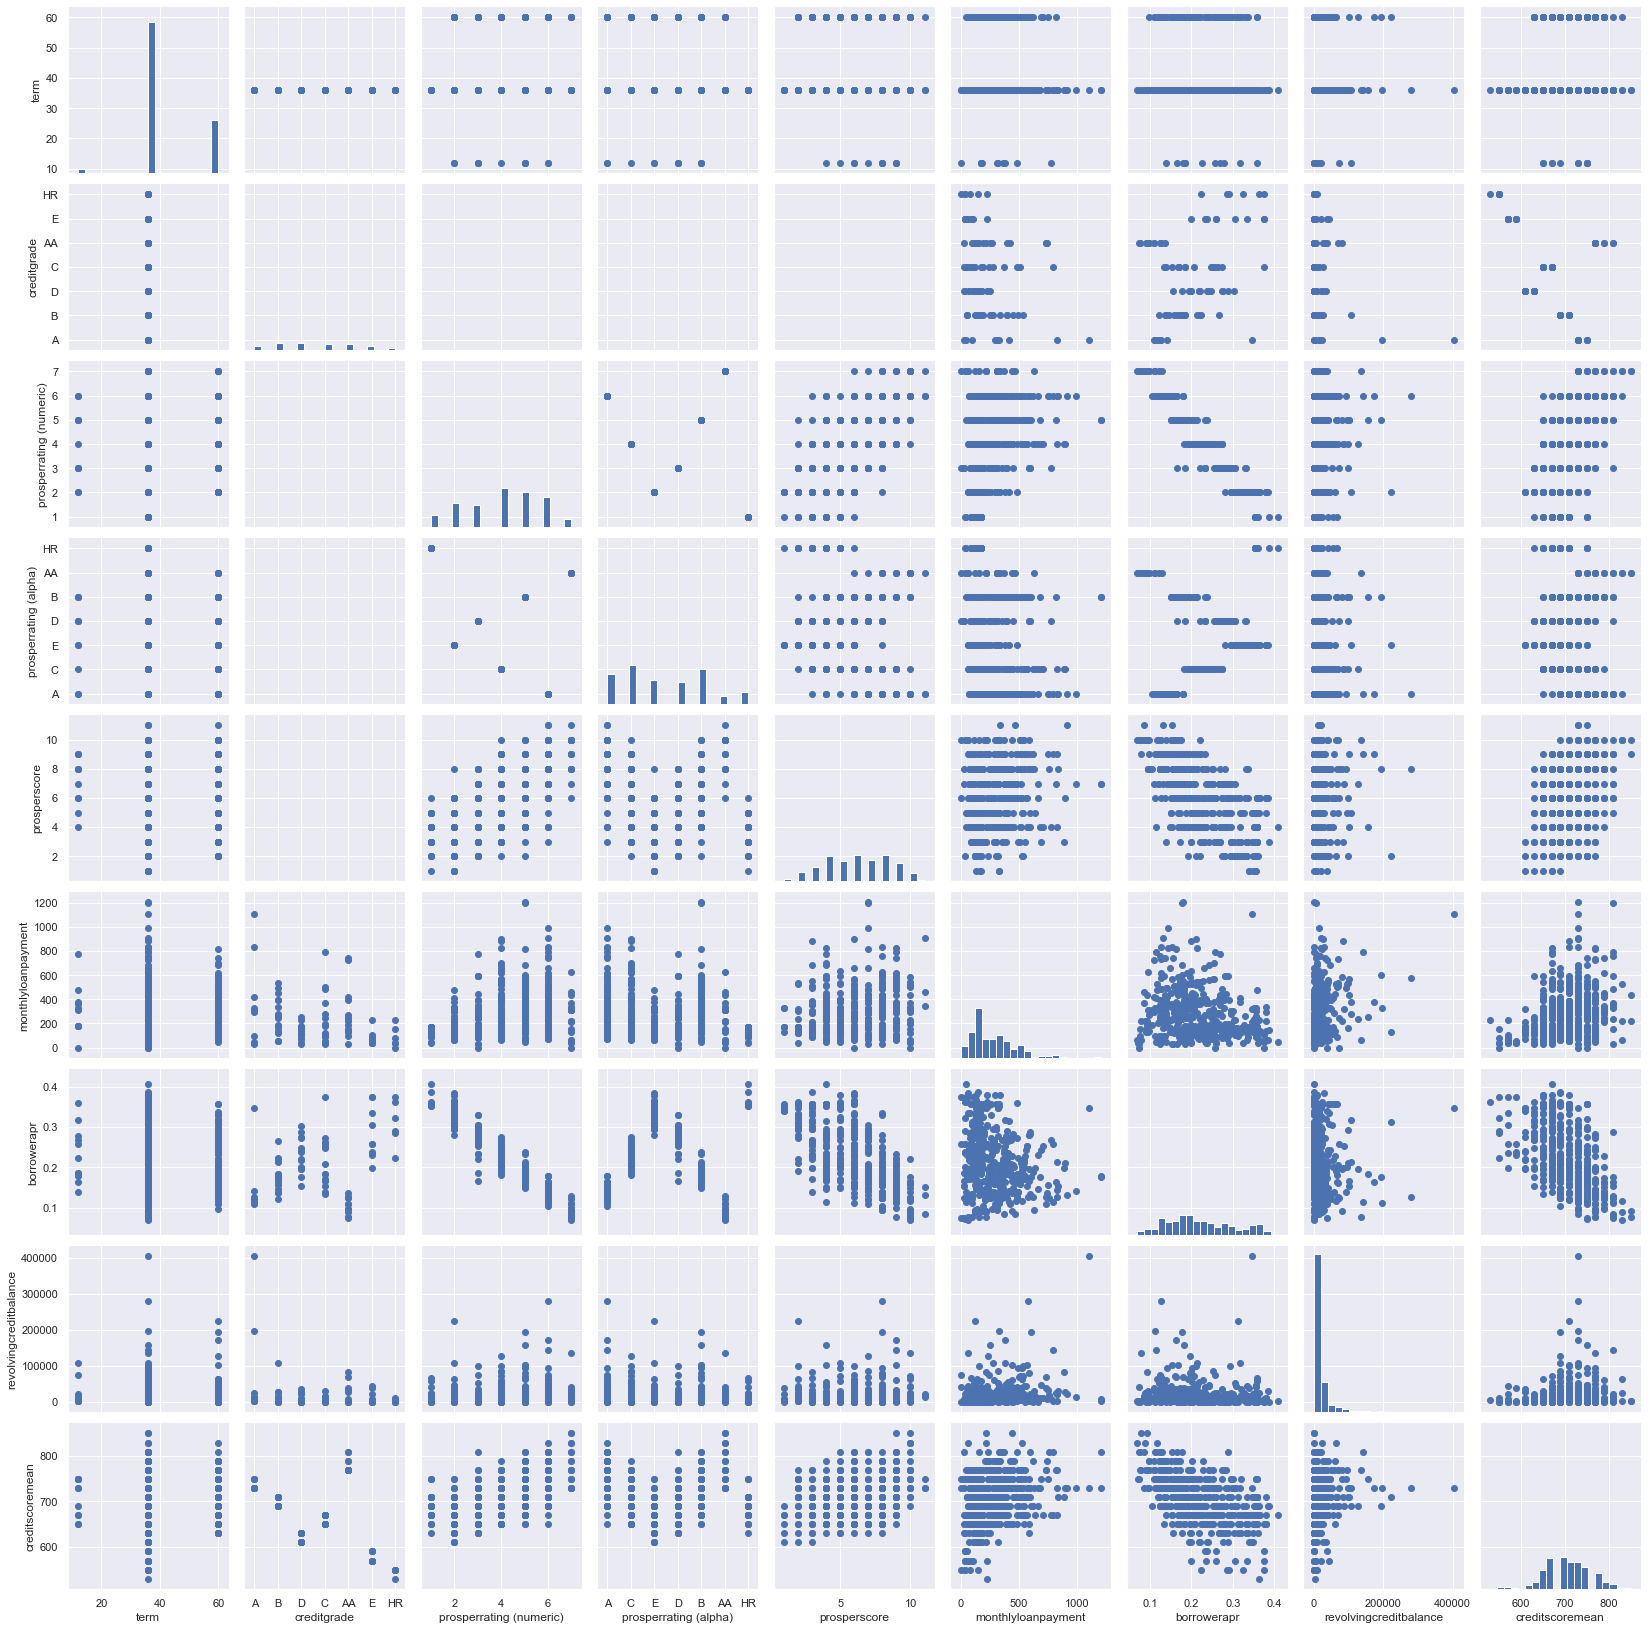

In [47]:
g = sb.PairGrid(data=stm, vars=nums_vars)
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);

Borrower APR and Prosper Score demonstrate the clearest trend of all our plots, Credit Score and Borrower APR also seem to be linked. Debt to Income ratio and Prosper score also seem to be negatively correlated. We'll first have a look at our categorical levels

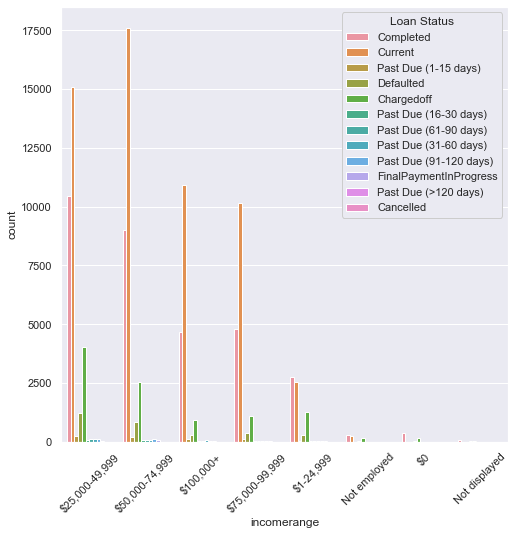

In [48]:
## #Exploring something
plt.figure(figsize=[8,8])
ax = sb.countplot(data = loan_df_li, x = 'incomerange', hue = 'loanstatus')
plt.xticks(rotation=45)
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Loan Status');


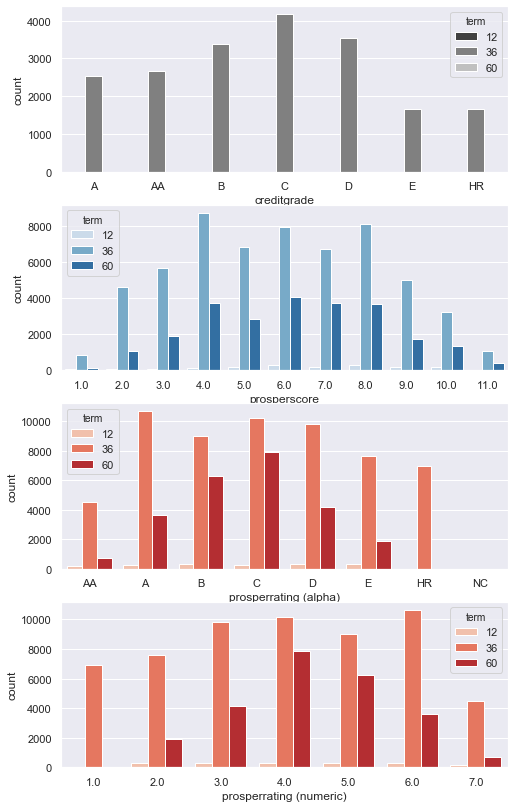

In [49]:
# Look at relationship between Term and the CreditGrade/ProsperRating(s) and ProsperScore
plt.figure(figsize=[8,14])

plt.subplot(4,1,1)
sb.countplot(data=loan_df_li, x='creditgrade', hue='term', palette='gray');


x = plt.subplot(4,1,2)
sb.countplot(data=loan_df_li, x='prosperscore', hue='term', palette='Blues');


x = plt.subplot(4,1,3)
sb.countplot(data=loan_df_li, x='prosperrating (alpha)', hue='term', palette='Reds');


x = plt.subplot(4,1,4)
sb.countplot(data=loan_df_li, x='prosperrating (numeric)', hue='term', palette='Reds');




The limited number of loans before July 2009 have no 12 or 60 month terms. But when looking at data after July 2009 we see that 60 month term loans were quite popular with those with a a ProsperRating of C and B. As seen before 36 month term loans are the most popular across all credit risk groups.

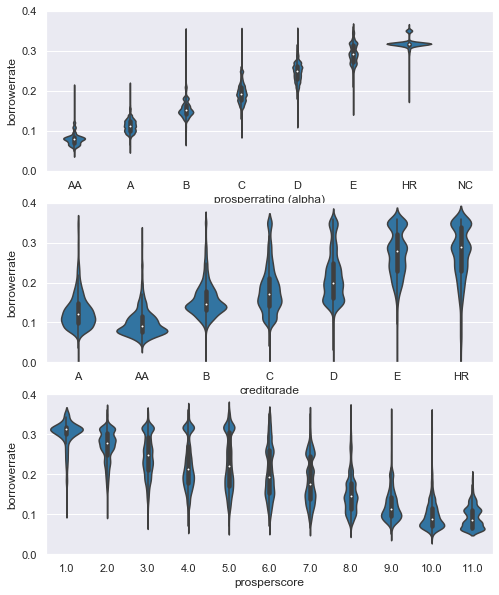

In [52]:
plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
sb.violinplot(data=loan_df_li, x='prosperrating (alpha)', y='borrowerrate', color=base_color);
plt.ylim((0,0.4));


plt.subplot(3,1,2)
sb.violinplot(data=loan_df_li, x='creditgrade', y='borrowerrate', color=base_color);
plt.ylim((0,0.4));

plt.subplot(3,1,3)
sb.violinplot(data=loan_df_li, x='prosperscore', y='borrowerrate', color=base_color);
plt.ylim((0,0.4));

Looking at the violin plots for the distribution of the different credit risks annd the BorrowerRate is that there is a negative correlation between having a higher (better) score and a lower interest rate
The distribution of the BorrowerRate is more distributed and the IQR is genrally larger for each rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Here First  Some of the credit risk variables seemed to be related to the interest rate of the loans. This was most pronounced with the ProsperRating (Alpha) data, but was evident in the other to a lesser extent
 and we found that the prosperscore was the number one factor in determining a borrower's APR , and it makes sense. 

However, results here appear reasonable, people with a higher (better) credit risk score will pay a lower interest rate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 Yes and we found Most Listing Categories are Debt Consolidation. Other popular ones inclure Home Improvement, Auto, Business, and Other

then  I did not explore all the features in the dataset because there are too many to include in this analysis.

## Multivariate Exploration

> i want to seet two things 

1-  why the Prosper Score is not very well correlated with the Borrower Rate based on the results I sawn in the bivariate exploration.

2- re-vewi the relationship between CreditScore and APR 

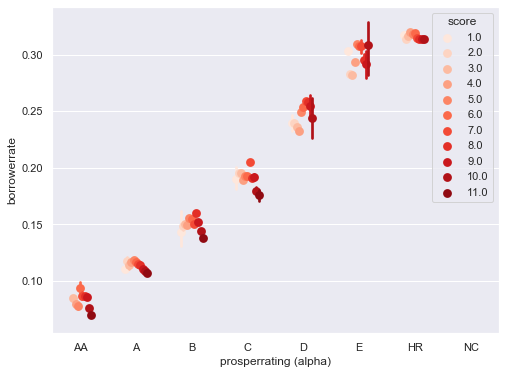

In [80]:
# Create a pointplot to show how the ProsperScore is distributed acorss the different credit risk scores 
# in relation to the BorrowerRate
fig = plt.figure(figsize=[8,6])

ax = sb.pointplot(data=loan_df_li, x='prosperrating (alpha)', y='borrowerrate', hue='prosperscore',
                  dodge=0.4, linestyles='', palette='Reds');
plt.legend(loc=1, title='score');

This look to suggest that the Prosper Score is using different criteria than the other credit risk scores in the dataset. Higher values of Prosper Scores are distributed across all of the different levels of the Prosper Rating

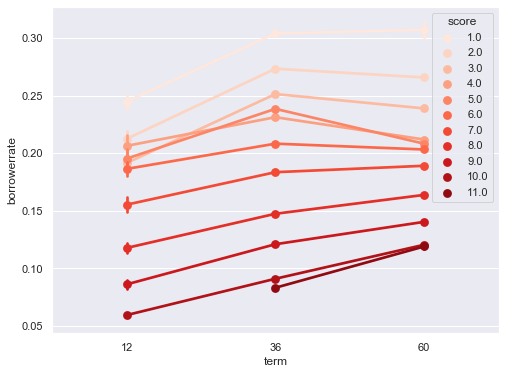

In [81]:
#Exploring
fig = plt.figure(figsize=[8,6])

ax = sb.pointplot(data=loan_df_li, x='term', y='borrowerrate', hue='prosperscore',
                   palette='Reds');
plt.legend(loc=1, title='score');

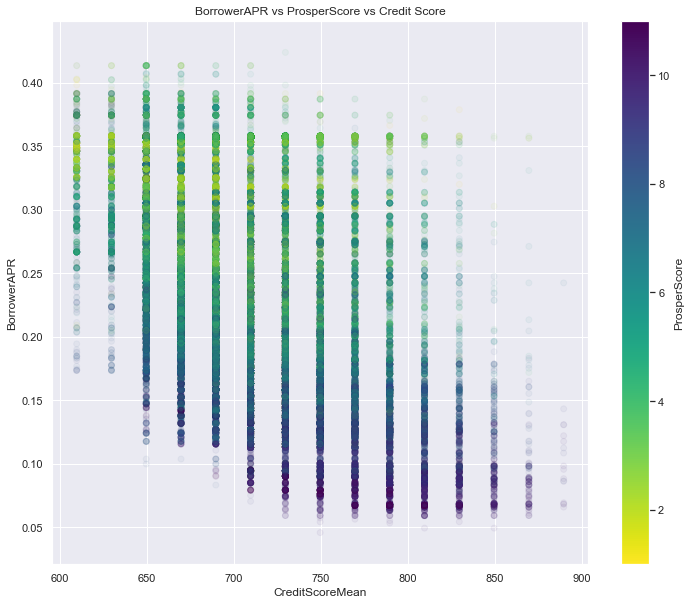

In [92]:
# Scatter plot to show relationship between Creditscore, ProsperScore and APR
plt.figure(figsize = [12,10])
plt.scatter(data=loan_df_li, x='creditscoremean', y='borrowerapr', c='prosperscore', cmap='viridis_r', alpha=0.05);
cbar = plt.colorbar(label='ProsperScore')
cbar.solids.set(alpha=1)
plt.title('BorrowerAPR vs ProsperScore vs Credit Score');
plt.xlabel('CreditScoreMean')
plt.ylabel('BorrowerAPR');

There are very few loans in range Prosperscore above 10 there are individuals who have credit ratings below 700

and the best APRs (Below 0.1) are mostly borrowers with a Prosperscore above 10


We'll add in Year for our individual plots and see how this changes our plots

In [67]:
# Add year column
loan_df_li['year'] = pd.to_datetime(loan_df_li['listingcreationdate']).dt.year
# Check this was completed correctly
loan_df_li.year.head()

F:\anaconda_files\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    2007
1    2014
3    2012
4    2013
5    2013
Name: year, dtype: int64

In [68]:
loan_df_li.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104594 entries, 0 to 113936
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   borrowerrate                104594 non-null  float64       
 1   listingcreationdate         104594 non-null  datetime64[ns]
 2   prosperscore                84853 non-null   float64       
 3   term                        104594 non-null  int64         
 4   monthlyloanpayment          104594 non-null  float64       
 5   statedmonthlyincome         104594 non-null  float64       
 6   borrowerapr                 104594 non-null  float64       
 7   debttoincomeratio           96187 non-null   float64       
 8   revolvingcreditbalance      104594 non-null  float64       
 9   borrowerstate               104594 non-null  object        
 10  listingcategory (numeric)   104594 non-null  object        
 11  listingkey                  104594 non-

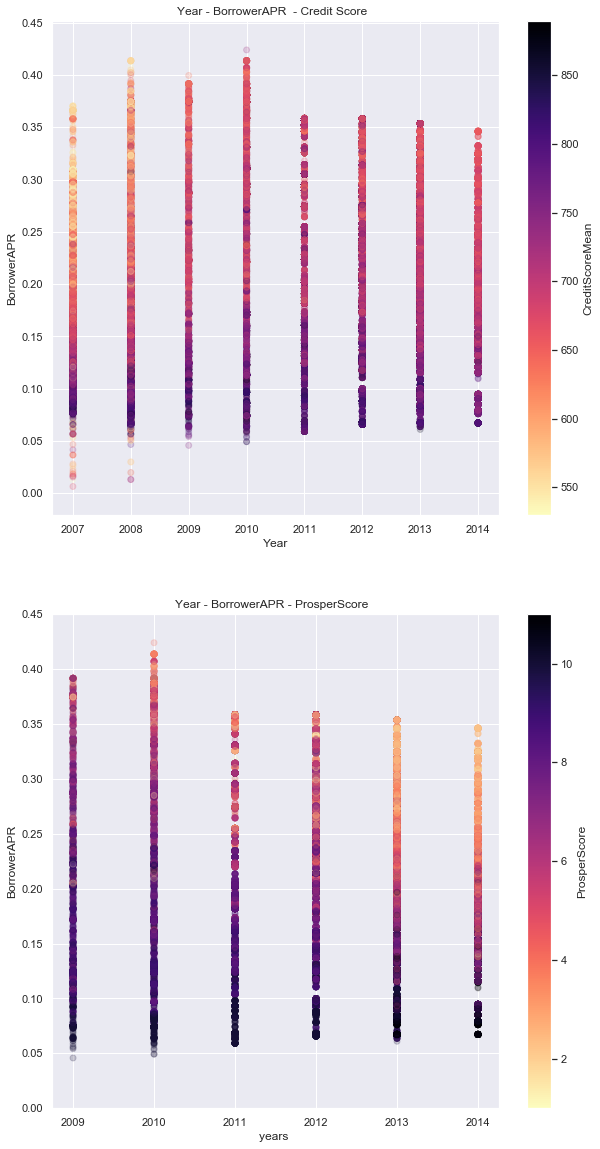

In [91]:
# Scatter plot to show relationship between Creditscore, ProsperScore and APR
plt.subplot(2,1,1)
plt.gcf().set_size_inches(10, 20)
plt.subplots_adjust(wspace=0.3)
plt.scatter(data=loan_df_li, x='year', y='borrowerapr', c='creditscoremean', cmap='magma_r', alpha=0.2);
cbar = plt.colorbar(label='CreditScoreMean')
cbar.solids.set(alpha=1)
plt.title('Year - BorrowerAPR  - Credit Score  ');
plt.xlabel('Year')
plt.ylabel('BorrowerAPR');
plt.yticks(np.arange(0, 0.5, step=0.05));

plt.subplot(2, 1, 2)
plt.gcf().set_size_inches(10, 20)
plt.subplots_adjust(wspace=0.2)
plt.scatter(data=loan_df_li, x='year', y='borrowerapr', c='prosperscore', cmap='magma_r', alpha=0.2);
cbar = plt.colorbar(label='ProsperScore')
cbar.solids.set(alpha=1)
plt.title('Year - BorrowerAPR - ProsperScore  ');
plt.xlabel('years ')
plt.ylabel('BorrowerAPR');
plt.yticks(np.arange(0, 0.5, step=0.05));

Our Creditscore plot seems quite consistent with what we would expect, the best credit scores on the bottom and our rates increase we see lower scores. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

When looking at the ProsperRating (Alpha) and the ProsperScore as it relates to the BorrowerRate I was able to see an explanation for why the ProsperScore wasn't as highly correlated to the BorrowerRate. It unlike the other credit risk features must use different criteria in coming up with it's value.

 We finds that banks won't lend you money if you have a low credit score but they have no problem giving you a credit card with an APR over 20.


### Were there any interesting or surprising interactions between features?
hese conclusions touched me personally

As I am a student, I am currently looking for opportunities to take a financial loan ,so i choose that data set 

As a result of this analysis, I found many things that may be very beneficial to me, and I found many values ​​that surprised me
I was surprised to see that the BorrowerRate increases for longer Term loans when split up by ProsperRating (numeric). The opposite relationship would be expected as longer term loans generally carry a lower risk profile and have a longer time to accrue interest.





> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!